In [9]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2


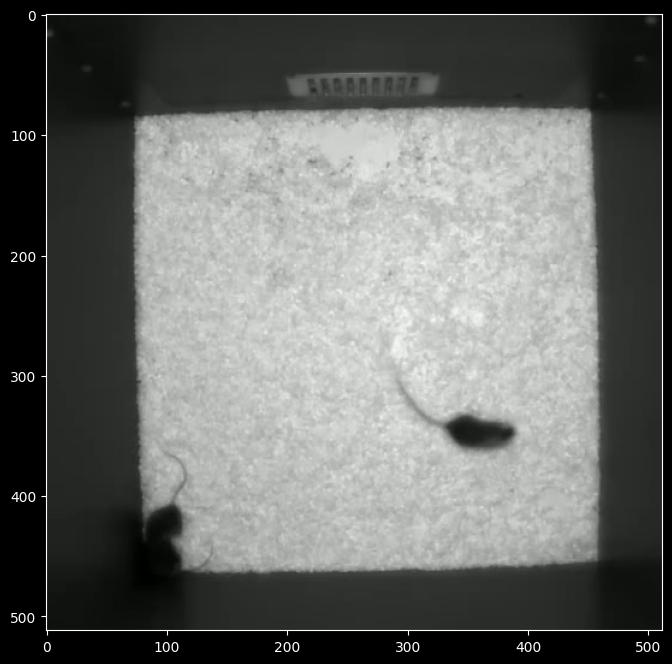

In [2]:
scene_frame_number = 100
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/MABe_template.yaml")

config['video_info']['scene_frame_number'] = scene_frame_number
config['keypoint_info']['keypoint_file_path'] = str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
config['video_info']['video_file_path'] = str(amadeus_root / config['video_info']['video_file_path'])

video_path = config['video_info']['video_file_path'] 


cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [3]:
amadeus = AMADEUS(config)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0 $
current total tokens 550
The image shows a top-down view of a square enclosure with two small animals inside. The animals appear to be mice, as indicated by their size and shape. The background is a textured surface, and there is a rectangular object at the top of the enclosure, which could be a vent or a light fixture.

```json
{
    "description": "Top-down view of a square enclosure with two mice inside. The background is a textured surface, and there is a rectangular object at the top of the enclosure.",
    "individuals": 2,
    "species": "topview_mouse",
    "background_objects": ["rectangular object"]
}
```


In [6]:
from IPython.display import Markdown, display
from IPython.display import Video
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print (f'videos generated to {qa_message["out_videos"]}')
    print ('Open it with media player if it does not properly display in the notebook')
    if qa_message['out_videos'] is not None:
        for video_path in qa_message['out_videos']:

            display(Video(video_path, embed=True))

    display(Markdown(str(qa_message['function_rets'])))

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.04 $
current total tokens 6149


To answer your query, we need to define the "watching" behavior based on the given criteria: the distance between animals should be less than 260 and larger than 50, and the head angle between animals should be less than 15 degrees. Additionally, the smooth_window_size is specified to be 15.

We can achieve this by using the `get_animals_animals_events` function from the `AnimalBehaviorAnalysis` class. This function allows us to capture events involving multiple animals based on specified conditions.

Here is the function to get the watching events:

```python
def get_watching_events(config: Config):
    '''
    Parameters:
    ----------
    config: Config
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Define the conditions for watching behavior
    cross_animal_query_list = ['distance>50', 'distance<260', 'relative_head_angle<15']
    
    # Get the watching events based on the defined conditions
    watching_events = analysis.get_animals_animals_events(
        cross_animal_query_list=cross_animal_query_list,
        bodypart_names=None,
        otheranimal_bodypart_names=None,
        min_window=0,
        max_window=100000,
        smooth_window_size=15
    )
    
    return watching_events
```

### Explanation:
1. **create_analysis(config)**: This function initializes the `AnimalBehaviorAnalysis` instance using the provided configuration.
2. **cross_animal_query_list**: This list contains the conditions for the watching behavior:
   - `distance>50`: The distance between animals should be greater than 50.
   - `distance<260`: The distance between animals should be less than 260.
   - `relative_head_angle<15`: The head angle between animals should be less than 15 degrees.
3. **get_animals_animals_events**: This function is used to capture events involving multiple animals based on the specified conditions. The `smooth_window_size` is set to 15 as specified.

This function will return the events where the animals are exhibiting the defined "watching" behavior.

OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@278.467] global cap_ffmpeg_impl.hpp:3133 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@278.467] global cap_ffmpeg_impl.hpp:3211 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@278.512] global cap_ffmpeg_impl.hpp:3133 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@278.512] global cap_ffmpeg_impl.hpp:3211 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@278.589] global cap_ffmpeg_impl.hpp:3133 open

out videosout videosout videosout videosout videosout videosout videosout videosout videosout videos
['event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_0.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_1.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_2.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_3.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_4.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_5.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_6.mp4']
after executing the function


OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@278.729] global cap_ffmpeg_impl.hpp:3133 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@278.729] global cap_ffmpeg_impl.hpp:3211 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@278.788] global cap_ffmpeg_impl.hpp:3133 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@278.788] global cap_ffmpeg_impl.hpp:3211 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
OpenCV: FFMPEG: tag 0x34363268/'h264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[ERROR:0@278.831] global cap_ffmpeg_impl.hpp:3133 open

{'description': 'Top-down view of a square enclosure with two mice inside. The background is a textured surface, and there is a rectangular object at the top of the enclosure.',
 'individuals': 2,
 'species': 'topview_mouse',
 'background_objects': ['rectangular object']}

videos generated to ['event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_0.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_1.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_2.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_3.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_4.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_5.mp4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video_6.mp4']
open it with movie displayer if it does not properly display in the notebook


[<amadeusgpt.analysis_objects.event.Event object at 0x7f18799b2170>, <amadeusgpt.analysis_objects.event.Event object at 0x7f18799b2350>, <amadeusgpt.analysis_objects.event.Event object at 0x7f18799b01f0>, <amadeusgpt.analysis_objects.event.Event object at 0x7f18799b24d0>, <amadeusgpt.analysis_objects.event.Event object at 0x7f18799b02b0>, <amadeusgpt.analysis_objects.event.Event object at 0x7f18799b2740>, <amadeusgpt.analysis_objects.event.Event object at 0x7f18799b2770>]

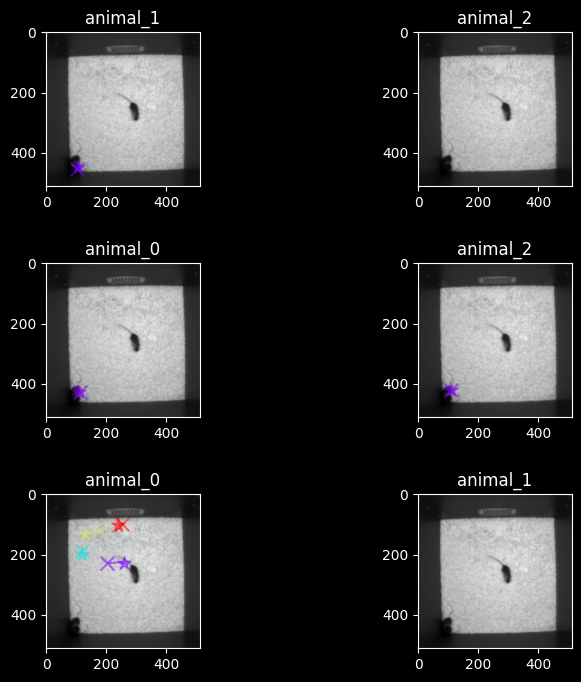

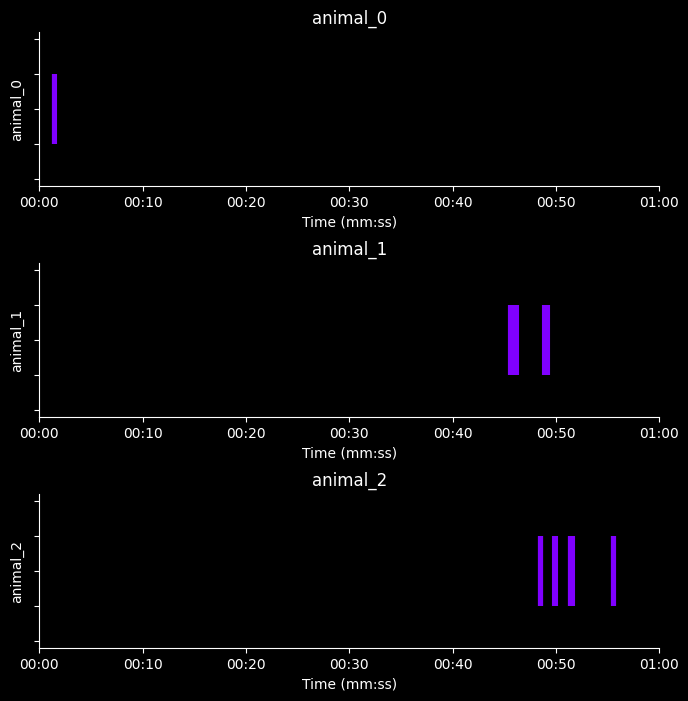

In [7]:
query = "Define watch as a social behavior where distance between animals is less than 260  \
and larger than 50 and head angle between animals is less than 15. The smooth_window_size is 15. Get watching"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)